# Введение

Прежде чем перейти к работе с *python* библиотеками их нужно установить.

Одним из способов установки библиотеки является использование командной строки и пакетного менеджера *pip*.

Чтобы вызвать комндну комндную строку в ячейке *Jupyter Notebook*  достаточно к начальной коменде добвить символ:" ! ".

Установка библиотек:  *pandas, numpy, scipy, matplotlib* через пакетный менеджер *pip*.

In [ ]:
!pip install pandas numpy scipy matplotlib

Импорт установленных бибилиотек с использованием пседонимов.

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# Numpy

[NumPy](https://numpy.org) — это библиотека Python, которую применяют для математических вычислений: начиная с базовых функций и заканчивая линейной алгеброй. Полное название библиотеки — Numerical Python extensions, или «Числовые расширения Python».

## Создание *numpy-массивов* и их индексация

Создать *numpy-массив* можно из обычного списка *python* используя функцию *array*.

In [ ]:
array = np.array([0, 1, 2, 3, 4, 5])
array

array([0, 1, 2, 3, 4, 5])

Для создания *numpy-массива* состоящего из элементов возрастающей последовательности удобно использовать функцию `arange`.

In [ ]:
another_array = np.arange(-5, 6)
another_array

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5])

Получение элементов *numpy-массива* не отличается от списков в *python*

In [ ]:
# Получить второй элемент
array[2]

2

In [ ]:
# Получить срез с 3 элемента по 7
another_array[3:8]

array([-2, -1,  0,  1,  2])

Существует возможность быстрого присвоения конкретного значения одной или нескольким позициям *numpy-массива*

In [ ]:
# Присвоение значение одной ячейки
another_array[5] = 999
another_array

array([ -5,  -4,  -3,  -2,  -1, 999,   1,   2,   3,   4,   5])

In [ ]:
# Присвоение значения срезу из массива
another_array[2:9] = -66
another_array

array([ -5,  -4, -66, -66, -66, -66, -66, -66, -66,   4,   5])

Если нужно произвести изменение только в некотором срезе *numpy-массива*, **без изменения** исходного массива, то нужно создать копию первоначального массива и затем уже модифицировать срез копии *numpy-массива*.

In [ ]:
# Копируем массив array
array_clone = array.copy()

# Создаем срез
my_slice = array_clone[2:5]
# Присваиваем значение  77 всем элементам среза начиная с первого
my_slice[1:] = 77
my_slice

array([ 2, 77, 77])

In [ ]:
array

array([0, 1, 2, 3, 4, 5])

## Двумерные массивы

Для некоторых задач машинного обучения возникает необходимость использовать

матрицы. В *numpy* их можно реализовать через создание массива с массивами.

In [ ]:
# Создаем матрицу, как массив массивов
matrix = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

# Получаем элемент из первой строки и 2 столбца строку
matrix[1][2]

6

In [ ]:
# Получаем первую строку матрицы
matrix[1:2, :]

array([[4, 5, 6]])

In [ ]:
# Получаем значения из первой строки матрицы
matrix[1, :]

array([4, 5, 6])

In [ ]:
# Получаем первый столбец
matrix[:, 1:2]

array([[2],
       [5],
       [8]])

In [ ]:
# Получаем значения из первого столбца
matrix[:, 1]

array([2, 5, 8])

Посмотрим, каким типом данных ялвяется матрица

In [ ]:
type(matrix)

numpy.ndarray

У типа данных `numpy.ndarray` есть несколько полезных методов. Начнем с *shape*.

In [ ]:
# Узнаем количество строк и столбцов в матрице
matrix.shape

(3, 3)

Иногда бывает удобным двумерный массив представить как одномерный или одномерный массив превратить в двумерный. Для этого стоит использовать метод *reshape*, которому в скобках нужно передать через запятую желаемый размер

In [ ]:
array

array([0, 1, 2, 3, 4, 5])

In [ ]:
# Преобразуем массив в двумерный массив
matrix_from_arr = array.reshape(2, 3)
matrix_from_arr

array([[0, 1, 2],
       [3, 4, 5]])

In [ ]:
# Обратное преобразование двумерного массива в одномерный массив
back_to_array = matrix_from_arr.reshape(-1)
back_to_array

array([0, 1, 2, 3, 4, 5])

## Генерации случайных значений

В *numpy* существует удобный модуль `random`.

Его стоит использовать для инициализации начальных значений каких-нибудь объектов.

Например, создадим матрицу из пяти строк и шести столбцов, заполненную целыми случайными числами
из отрезка $[-5, 5].$

In [ ]:
# Создание матрицы
random_matrix = np.random.randint(-5, 6,  size=(5, 6))
random_matrix

array([[-4, -1,  0, -3, -3, -4],
       [ 3,  2,  2,  2,  2, -2],
       [ 1,  5,  2, -2,  5,  3],
       [-1,  0,  2,  4,  1, -1],
       [-4, -3,  0, -4,  4,  2]])

При повтором запуске ячейки выше будет происходить генерация случайных чисел, важно отметить, что генераторы случайных чисел в *nympy* не обладают криптографической стойкостью.

Иногда возникает необходимость, чтобы при каждом запуске ячейки в ней генерировались одни и те же случайные числа.

Для это нужно использовать функцию `seed`, которая в качестве начального аргумента принимает целое число, фиксирующее конкретное состояние генератора случайных чисел внутри вызванной ячейки.

In [ ]:
# Фиксируем состояние генератора
np.random.seed(3)

random_freeze_matrix = np.random.randint(-10, 11,  size=(3, 3))
random_freeze_matrix

array([[  0,  -7,  -2],
       [-10,   9,   0],
       [  1,  -1,   0]])

## Операции

Одной из ключевых особенностей *numpy* являются *numpy-массивы*, так с ними можно проводить те же операции, что и с математическими векторами.



In [ ]:
np.random.seed(2)
# Создаем массив состоящий из пяти случайных элементов
vec_1 = np.random.randint(-5, 6,  size=(5))
vec_1

array([ 3,  3,  1, -3,  3])

In [ ]:
np.random.seed(3)
# Создаем другой массив состоящий из пяти случайных элементов
vec_2 = np.random.randint(-5, 6,  size=(5))
vec_2

array([ 5,  3,  4, -2,  3])

In [ ]:
# Сложение массивов
vec_1 + vec_2

array([ 8,  6,  5, -5,  6])

In [ ]:
# Умножение на скаляр
vec_1 * 2

array([ 6,  6,  2, -6,  6])

In [ ]:
# Прибавление скаляра ко всем элементам массива
vec_1 + 5

array([8, 8, 6, 2, 8])

Выше описанные операции аналогичным образом работают и для многомерных *numpy-массивов*.

In [ ]:
# Создаем матрицу
matrix = np.random.randint(-5, 6,  size=(3,5))
matrix

array([[ 3, -5,  0, -2,  5],
       [ 4,  4,  5,  0,  2],
       [ 1, -5, -1,  2,  3]])

В *numpy* через символ "@" определено матричное умножение. Существует несколько способов вычисления, которые зависят от желаемого результирующего типа данных. В одном случае можно получить ответ в виде массива, а другой в виде матрицы.

In [ ]:
vec_1

array([ 3,  3,  1, -3,  3])

In [ ]:
vec_1.reshape(-1,1)

array([[ 3],
       [ 3],
       [ 1],
       [-3],
       [ 3]])

In [ ]:
# Результат  матричного умножения в виде массива
matrix @ vec_1

array([ 15,  35, -10])

In [ ]:
# Результат матричного умножения, в виде вектор-столбца
matrix @ vec_1.reshape(-1,1)

array([[ 15],
       [ 35],
       [-10]])

# Pandas

[Pandas](https://github.com/numpy/numpy) — это open-source библиотека Python для обработки и анализа структурированных данных(таблиц, json-файлов, текстовых данных). Чтобы анализировать данные с помощью Pandas, нужно понять, как устроены структуры этих данных внутри библиотеки.

В первую очередь разберем, что такое DataFrame и Series, а после изучим методы работы с ними.

## Series

**Series** - это проиндексированный одномерный массив значений. Он очень похож на массив *numpy* (в его основе как раз и лежит массив *numpy*). Отличие *Series* в том, что в нём для каждого элемента можно указать некоторое название (метка - *label*). В результате можно обращаться к отдельному элементу *Series* не только по его номеру внутри массива, как в *numpy*, но и по значению метки. В этом отношении Series очень похож на словарь (*Dictionary*). Метки могут быть любого типа данных, необязательно числа или строки.

С подробной информацией о *DataFrame* можно ознакомиться, если вызвать справку о данном объекте:

In [ ]:
#help(pd.Series)

### Как создать Series?

Так как  *Series* - это проиндексированный одномерный массив значений, то логично, что создать его можно из списков стандартной библиотеки *python*, массивов *numpy* *Array*, а также из словарей.

Создадим несколько списков для демонстрации:

In [ ]:
myindex = ['France','China','Mexico']
mydata = [1776,1234,2995]
mynumpy = np.array([1,23,5,6,7])
mycolleagues = {'Sammy':25,'Frank':30,'Spike':27}

Проверим их типы

In [ ]:
print( type(myindex), type(mydata), type(mynumpy),  type(mycolleagues))

<class 'list'> <class 'list'> <class 'numpy.ndarray'> <class 'dict'>


Теперь преобразуем списки к типу *Series* с помощью метода `Series` и выведем один из получившихся объектов

In [ ]:
myindex_pandas = pd.Series(data=mydata)
mydata_pandas = pd.Series(data=mydata)
mycolleagues_pandas = pd.Series(mycolleagues)
mydata_pandas = pd.Series(data=mynumpy)

print(myindex_pandas)

0    1776
1    1234
2    2995
dtype: int64


In [ ]:
mydata_pandas

0     1
1    23
2     5
3     6
4     7
dtype: int64

In [ ]:
mydata_pandas

0     1
1    23
2     5
3     6
4     7
dtype: int64

In [ ]:
mycolleagues_pandas

Sammy    25
Frank    30
Spike    27
dtype: int64

Изучим, например, объект `myindex_pandas`. Визуально он похож на пронумерованный список: слева в колонке находятся индексы элементов, а справа — сами элементы.

Индексом может быть числовой показатель (0, 1, 2…), буквенные значения (a, b, c…) или другие данные. Если индекс не задан, то автоматически проставляются числа. Например, от 0 до 2 как в примере выше. Такая нумерация называется `RangeIndex`, в ней всегда содержатся числа от 0 до определенного числа N. Количество элементов в таком объекте равно N+1.

Теперь попробуем назначить собственные индексы. Для этого в метод *Series* передадим два парамера: `data` и `index`.


In [ ]:
pd.Series(data=mydata,index=myindex)

France    1776
China     1234
Mexico    2995
dtype: int64

### Как работать с объектами Series?

Допустим у нас есть данные о количестве капибар в зоопарках различных стран.

In [ ]:
c1 = {'Japan': 80, 'China': 450, 'India': 200, 'USA': 250}

In [ ]:
# Преобразуем данные в Pandas Series
amount_c1 = pd.Series(c1)

In [ ]:
amount_c1

Japan     80
China    450
India    200
USA      250
dtype: int64

Что делать, если мы хотим узнать количество капибар в отдельной стране?

In [ ]:
# Получаем отдельный элемент массива с помощью его названия
amount_c1['Japan']

80

In [ ]:
# Также сохраняется возможность получить элемент по его номеру позиции внутри массива!
amount_c1[0]

80

**Однако будьте аккуратны! Если вы неправильно укажете индекс, то возникнет ошибка KeyError.**

Мы подготовили несколько частотных случаев, когда это случается.

In [ ]:
# Обращение к элементу, который не содержится в нашем Series
#amount_c1['France']

In [ ]:
# Лишний пробел в названии тоже создаст ошибку
#amount_c1['USA ']

In [ ]:
# Случайно написали название не в том регистре - маленькими буквами
# amount_c1['usa']

Что делать, если нужно получить индексы Series?

In [ ]:
amount_c1.keys()

Index(['Japan', 'China', 'India', 'USA'], dtype='object')

Также для объектов *Series* доступны broadcast-действия (аналогичные операции мы уже делали с *numpy-массивами*). Например, можно умножить все элементы Series на число:

In [ ]:
amount_c1 * 2

Japan    160
China    900
India    400
USA      500
dtype: int64

In [ ]:
amount_c1 * amount_c1

Japan      6400
China    202500
India     40000
USA       62500
dtype: int64

## DataFrame

На протяжении всего курсы мы будем очень много работать с объектами *DataFrame*. Они являются естественным продолжением *Pandas Series*.

Определение *DataFrame* следующее:
Pandas DataFrame состоит из нескольких объектов *Pandas Series* с общими значениями индекса.
По сути, если *Series - это одномерный проиндексированный массив, то DataFrame - многомерный проиндексированный массив*, в котором каждый столбец является массивом Series.

При этом для столбцов и строк вводятся свои индексы.

С подробной информацией о *DataFrame* можно ознакомиться, если вызвать справку о данном объекте:

In [ ]:
#help(pd.DataFrame)

### Как создавать DataFrame?

Для работы нам понадобится зафиксировать параметры генерации случайных чисел с помощью команды `np.random.seed()`. Подробнее о ней можно узнать по [ссылке](https://stackoverflow.com/questions/21494489/what-does-numpy-random-seed0-do).

Сгенерируем матрицу со случайными значениями:


In [ ]:
np.random.seed(101)
mydata = np.random.randint(0,101,(4,3))

In [ ]:
mydata

array([[95, 11, 81],
       [70, 63, 87],
       [75,  9, 77],
       [40,  4, 63]])

Сгенерируем списки индексов

In [ ]:
myindex = ['KZ','RU','JP','US']

In [ ]:
mycolumns = ['Jan','Feb','Mar']

Создадим объект *DataFrame* из матрицы `mydata` c помощью одноименного метода.

In [ ]:
df = pd.DataFrame(data=mydata)
df

,0,1,2
0,95,11,81
1,70,63,87
2,75,9,77
3,40,4,63


У данного *DataFrame* индексы числовые. Однако, это неудобно для работы с крупными таблицами. Поэтому мы создадим *DataFrame* c индексами для строк и столбцов. Для этого в метод `pd.DataFrame` мы передадим еще и параметры `index` и `columns`:


In [ ]:
df = pd.DataFrame(data=mydata,index=myindex,columns=mycolumns)
df

,Jan,Feb,Mar
KZ,95,11,81
RU,70,63,87
JP,75,9,77
US,40,4,63


In [ ]:
# Кстати, библиотека не запрещает передавать только параметр index или параметр columns
df = pd.DataFrame(data=mydata,index=myindex)
df

,0,1,2
KZ,95,11,81
RU,70,63,87
JP,75,9,77
US,40,4,63


## Работа с таблицами:


***Замечание: Позже в этом курсе мы рассмотрим много различных типов файлов — `.html`, `.csv`, `.xlsx` и другие. Но сейчас мы ограничимся только форматом `.csv`.***

Часто данные для исследования предоставлены в формате .csv (Comma Separated Values), в котором содержатся отдельные значения данных, отделённые друг от друга с помощью знаков-разделителей (чаще всего запятых).

### Получение информации о датасете

Мы будем работать с датасетом [Countries of the World - 2023](https://www.kaggle.com/datasets/nelgiriyewithana/countries-of-the-world-2023?resource=download)

Этот набор данных предоставляет обширную информацию обо всех странах мира. Она охватывает демографическую статистику, экономические показатели, факторы окружающей среды, показатели здравоохранения, статистику образования и многое другое. Поскольку представлена каждая страна, этот набор данных предлагает полный глобальный взгляд на различные аспекты жизни наций, позволяя проводить углубленный анализ и межстрановые сравнения.


### Загрузка датасета



**Путь к файлу**

Когда нужно обратиться к файлу в pandas, используется метод `pd.read_csv`, в который нужно передать строку с путем к файлу:

1. Если Ваш файл .csv находится **в той же самой** папке, что и файл .py или блокнот .ipynb, то можно просто указать название этого файла .csv. Например:
    
        df = pd.read_csv('some_file.csv')
        
2. Либо второй вариант - если файл .csv находится в другой папке, то можно указать полный путь к нему. Обратите внимание, что путь должен быть на 100% правильным. Например:

        df = pd.read_csv("C:\\Users\\myself\\files\\some_file.csv")


Загрузим датасет для занятия:

In [ ]:
df = pd.read_csv('./world-data-2023.csv')

In [ ]:
df

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32,VE,24.50%,"912,050","343,000",17.88,58.0,Caracas,"164,175",...,45.80%,1.92,"28,515,829",59.70%,NaN,73.30%,8.80%,"25,162,368",6.423750,-66.589730
191,Vietnam,314,VN,39.30%,"331,210","522,000",16.75,84.0,Hanoi,"192,668",...,43.50%,0.82,"96,462,106",77.40%,19.10%,37.60%,2.01%,"35,332,140",14.058324,108.277199
192,Yemen,56,YE,44.60%,"527,968","40,000",30.45,967.0,Sanaa,"10,609",...,81.00%,0.31,"29,161,922",38.00%,NaN,26.60%,12.91%,"10,869,523",15.552727,48.516388
193,Zambia,25,ZM,32.10%,"752,618","16,000",36.19,260.0,Lusaka,"5,141",...,27.50%,1.19,"17,861,030",74.60%,16.20%,15.60%,11.43%,"7,871,713",-13.133897,27.849332


In [ ]:
#Выведем список названий столбцов датасета
df.columns

Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

In [ ]:
#Выведем список названий строк датасета
#Отметим, что в нашем датасете строки пронумерованы с помощью объекта RangeIndex
df.index

RangeIndex(start=0, stop=195, step=1)

У Series и Dataframe индексы можно менять:

In [ ]:
df = df.set_index('Country')

In [ ]:
df

,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",149.9,...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",119.05,...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",151.36,...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,NaN,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",261.73,...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,32,VE,24.50%,"912,050","343,000",17.88,58.0,Caracas,"164,175","2,740.27",...,45.80%,1.92,"28,515,829",59.70%,NaN,73.30%,8.80%,"25,162,368",6.423750,-66.589730
Vietnam,314,VN,39.30%,"331,210","522,000",16.75,84.0,Hanoi,"192,668",163.52,...,43.50%,0.82,"96,462,106",77.40%,19.10%,37.60%,2.01%,"35,332,140",14.058324,108.277199
Yemen,56,YE,44.60%,"527,968","40,000",30.45,967.0,Sanaa,"10,609",157.58,...,81.00%,0.31,"29,161,922",38.00%,NaN,26.60%,12.91%,"10,869,523",15.552727,48.516388


Выведем первые 3 строки датасета с помощью команды `df.head(3)`.

In [ ]:
df.head(3)

,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",149.9,...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",119.05,...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",151.36,...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626


Аналогичным образом можно вывести последние 3 строки датасета с помощью команды `df.tail(3)`

In [ ]:
df.tail(3)

,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
Country,,,,,,,,,,,,,,,,,,,,,
Yemen,56,YE,44.60%,"527,968","40,000",30.45,967.0,Sanaa,"10,609",157.58,...,81.00%,0.31,"29,161,922",38.00%,NaN,26.60%,12.91%,"10,869,523",15.552727,48.516388
Zambia,25,ZM,32.10%,"752,618","16,000",36.19,260.0,Lusaka,"5,141",212.31,...,27.50%,1.19,"17,861,030",74.60%,16.20%,15.60%,11.43%,"7,871,713",-13.133897,27.849332
Zimbabwe,38,ZW,41.90%,"390,757","51,000",30.68,263.0,Harare,"10,983",105.51,...,25.80%,0.21,"14,645,468",83.10%,20.70%,31.60%,4.95%,"4,717,305",-19.015438,29.154857


Иногда датасеты бывают огромными, а потому в них очень сложно ориентироваться и находить информацию о том

*   сколько пустых значений(NaN) есть в *DataFrame*?

*   данные какого типа вводятся в каждом конкретном столбце?

*   сколько весит датасет?

Для этих целей есть метод `df.info()`



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, Afghanistan to Zimbabwe
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Density
(P/Km2)                            195 non-null    object 
 1   Abbreviation                               188 non-null    object 
 2   Agricultural Land( %)                      188 non-null    object 
 3   Land Area(Km2)                             194 non-null    object 
 4   Armed Forces size                          171 non-null    object 
 5   Birth Rate                                 189 non-null    float64
 6   Calling Code                               194 non-null    float64
 7   Capital/Major City                         192 non-null    object 
 8   Co2-Emissions                              188 non-null    object 
 9   CPI                                        178 non-null    object 
 10  CPI Change (%)  

In [ ]:
# Также длину датасета можно узнать с помощью len()
len(df)

195

In [ ]:
# Или с помощью df.shape, который выведет число строк и столбцов
df.shape

(195, 34)

Для столбцов с численными данными можно вывести описательную статистику:

*   *count* - Число ненулевых значений.
*   *mean* - Среднее значение.
*   *std* - Стандартное отклонение.
*   *min* - Минимальное значение.
*   *25%* - Нижний процентиль
*   *50%* - 50% процентиль (совпадает с медианой).
*   *75%* - Верхний процентиль.
*   *max* - Максимальное значение.


In [ ]:
df.describe()

,Birth Rate,Calling Code,Fertility Rate,Infant mortality,Life expectancy,Maternal mortality ratio,Physicians per thousand,Latitude,Longitude
count,189.000000,194.000000,188.000000,189.000000,187.000000,181.000000,188.000000,194.000000,194.000000
mean,20.214974,360.546392,2.698138,21.332804,72.279679,160.392265,1.839840,19.092351,20.232434
std,9.945774,323.236419,1.282267,19.548058,7.483661,233.502024,1.684261,23.961779,66.716110
min,5.900000,1.000000,0.980000,1.400000,52.800000,2.000000,0.010000,-40.900557,-175.198242
25%,11.300000,82.500000,1.705000,6.000000,67.000000,13.000000,0.332500,4.544175,-7.941496
50%,17.950000,255.500000,2.245000,14.000000,73.200000,53.000000,1.460000,17.273849,20.972652
75%,28.750000,506.750000,3.597500,32.700000,77.500000,186.000000,2.935000,40.124603,48.281523
max,46.080000,1876.000000,6.910000,84.500000,85.400000,1150.000000,8.420000,64.963051,178.065032


In [ ]:
#Иногда для простоты можно транспонировать DataFrame
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Birth Rate,189.0,20.214974,9.945774,5.900000,11.300000,17.950000,28.750000,46.080000
Calling Code,194.0,360.546392,323.236419,1.000000,82.500000,255.500000,506.750000,1876.000000
Fertility Rate,188.0,2.698138,1.282267,0.980000,1.705000,2.245000,3.597500,6.910000
Infant mortality,189.0,21.332804,19.548058,1.400000,6.000000,14.000000,32.700000,84.500000
Life expectancy,187.0,72.279679,7.483661,52.800000,67.000000,73.200000,77.500000,85.400000
Maternal mortality ratio,181.0,160.392265,233.502024,2.000000,13.000000,53.000000,186.000000,1150.000000
Physicians per thousand,188.0,1.839840,1.684261,0.010000,0.332500,1.460000,2.935000,8.420000
Latitude,194.0,19.092351,23.961779,-40.900557,4.544175,17.273849,40.124603,64.963051
Longitude,194.0,20.232434,66.716110,-175.198242,-7.941496,20.972652,48.281523,178.065032


### Получение данных по столбцам

Получение данных по индексу в DataFrame эквивалентно для Series:

In [ ]:
df['Life expectancy']

Country
Afghanistan    64.5
Albania        78.5
Algeria        76.7
Andorra         NaN
Angola         60.8
               ... 
Venezuela      72.1
Vietnam        75.3
Yemen          66.1
Zambia         63.5
Zimbabwe       61.2
Name: Life expectancy, Length: 195, dtype: float64

In [ ]:
#Полученный объект является Series
type(df['Life expectancy'])

pandas.core.series.Series

In [ ]:
# Если вы хотите получить данные сразу из нескольких столбцов, то их названия нужно передать списком(list)
# Поэтому здесь два набора квадратных скобок.
df[['Life expectancy','Calling Code']]

,Life expectancy,Calling Code
Country,,
Afghanistan,64.5,93.0
Albania,78.5,355.0
Algeria,76.7,213.0
Andorra,NaN,376.0
Angola,60.8,244.0
...,...,...
Venezuela,72.1,58.0
Vietnam,75.3,84.0
Yemen,66.1,967.0


### Получение данных по строкам

Есть два похожих метода, которые позволяют получать строки из DataFrame — `df.loc` и `df.iloc`. Они похожи, но отличаются тем, что `iloc` используется для получения строки по номеру(число), а `loc` — по названию.

In [ ]:
# На основе номера строки - числа Integer
df.iloc[0]

Density\n(P/Km2)                                           60
Abbreviation                                               AF
Agricultural Land( %)                                  58.10%
Land Area(Km2)                                        652,230
Armed Forces size                                     323,000
Birth Rate                                              32.49
Calling Code                                             93.0
Capital/Major City                                      Kabul
Co2-Emissions                                           8,672
CPI                                                     149.9
CPI Change (%)                                          2.30%
Currency-Code                                             AFN
Fertility Rate                                           4.47
Forested Area (%)                                       2.10%
Gasoline Price                                         $0.70 
GDP                                          $19,101,353,833 
Gross pr

Если в датасете  индексы заданы строковыми значениями, то можно

In [ ]:
# На основе названия (на основе значения колонки-индекса)
df.loc['Italy']

Density\n(P/Km2)                                             206
Abbreviation                                                  IT
Agricultural Land( %)                                     43.20%
Land Area(Km2)                                           301,340
Armed Forces size                                        347,000
Birth Rate                                                   7.3
Calling Code                                                39.0
Capital/Major City                                          Rome
Co2-Emissions                                            320,411
CPI                                                       110.62
CPI Change (%)                                             0.60%
Currency-Code                                                EUR
Fertility Rate                                              1.29
Forested Area (%)                                         31.80%
Gasoline Price                                            $1.61 
GDP                      

In [ ]:
df.iloc[0:7]

,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",149.9,...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",119.05,...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",151.36,...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,NaN,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",261.73,...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
Antigua and Barbuda,223,AG,20.50%,443,0,15.33,1.0,"St. John's, Saint John",557,113.81,...,24.30%,2.76,"97,118",NaN,16.50%,43.00%,NaN,"23,800",17.060816,-61.796428
Argentina,17,AR,54.30%,"2,780,400","105,000",17.02,54.0,Buenos Aires,"201,348",232.75,...,17.60%,3.96,"44,938,712",61.30%,10.10%,106.30%,9.79%,"41,339,571",-38.416097,-63.616672


In [ ]:
df.loc[['Andorra','Argentina']]

,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
Country,,,,,,,,,,,,,,,,,,,,,
Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,NaN,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
Argentina,17,AR,54.30%,"2,780,400","105,000",17.02,54.0,Buenos Aires,"201,348",232.75,...,17.60%,3.96,"44,938,712",61.30%,10.10%,106.30%,9.79%,"41,339,571",-38.416097,-63.616672


### Удаление элементов

Выведем наш датасет

In [ ]:
df

,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",149.9,...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",119.05,...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",151.36,...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,NaN,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",261.73,...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,32,VE,24.50%,"912,050","343,000",17.88,58.0,Caracas,"164,175","2,740.27",...,45.80%,1.92,"28,515,829",59.70%,NaN,73.30%,8.80%,"25,162,368",6.423750,-66.589730
Vietnam,314,VN,39.30%,"331,210","522,000",16.75,84.0,Hanoi,"192,668",163.52,...,43.50%,0.82,"96,462,106",77.40%,19.10%,37.60%,2.01%,"35,332,140",14.058324,108.277199
Yemen,56,YE,44.60%,"527,968","40,000",30.45,967.0,Sanaa,"10,609",157.58,...,81.00%,0.31,"29,161,922",38.00%,NaN,26.60%,12.91%,"10,869,523",15.552727,48.516388


Если мы заходим удалить столбец, то это можно сделать с помощью метода `df.drop`, которому нужно передать название столбца и параметр "axis=1".

Однако, есть особенность.

In [ ]:
df.drop('Density\n(P/Km2)', axis=1)

,Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",149.9,2.30%,...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
Albania,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",119.05,1.40%,...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
Algeria,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",151.36,2.00%,...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
Andorra,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,NaN,NaN,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
Angola,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",261.73,17.10%,...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,VE,24.50%,"912,050","343,000",17.88,58.0,Caracas,"164,175","2,740.27",254.90%,...,45.80%,1.92,"28,515,829",59.70%,NaN,73.30%,8.80%,"25,162,368",6.423750,-66.589730
Vietnam,VN,39.30%,"331,210","522,000",16.75,84.0,Hanoi,"192,668",163.52,2.80%,...,43.50%,0.82,"96,462,106",77.40%,19.10%,37.60%,2.01%,"35,332,140",14.058324,108.277199
Yemen,YE,44.60%,"527,968","40,000",30.45,967.0,Sanaa,"10,609",157.58,8.10%,...,81.00%,0.31,"29,161,922",38.00%,NaN,26.60%,12.91%,"10,869,523",15.552727,48.516388


Однако, есть особенность.

Если снова вывести датасет, то удаленный столбец окажется на своем месте

In [ ]:
df

,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",149.9,...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",119.05,...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",151.36,...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,NaN,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",261.73,...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,32,VE,24.50%,"912,050","343,000",17.88,58.0,Caracas,"164,175","2,740.27",...,45.80%,1.92,"28,515,829",59.70%,NaN,73.30%,8.80%,"25,162,368",6.423750,-66.589730
Vietnam,314,VN,39.30%,"331,210","522,000",16.75,84.0,Hanoi,"192,668",163.52,...,43.50%,0.82,"96,462,106",77.40%,19.10%,37.60%,2.01%,"35,332,140",14.058324,108.277199
Yemen,56,YE,44.60%,"527,968","40,000",30.45,967.0,Sanaa,"10,609",157.58,...,81.00%,0.31,"29,161,922",38.00%,NaN,26.60%,12.91%,"10,869,523",15.552727,48.516388


Если столбец все же нужно окончательно удалить из датасета, то нужно воспользоваться следующей конструкцией, которая переопределит исходный датасет.

In [ ]:
df = df.drop('Density\n(P/Km2)', axis=1)

In [ ]:
df

,Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",149.9,2.30%,...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
Albania,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",119.05,1.40%,...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
Algeria,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",151.36,2.00%,...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
Andorra,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,NaN,NaN,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
Angola,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",261.73,17.10%,...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,VE,24.50%,"912,050","343,000",17.88,58.0,Caracas,"164,175","2,740.27",254.90%,...,45.80%,1.92,"28,515,829",59.70%,NaN,73.30%,8.80%,"25,162,368",6.423750,-66.589730
Vietnam,VN,39.30%,"331,210","522,000",16.75,84.0,Hanoi,"192,668",163.52,2.80%,...,43.50%,0.82,"96,462,106",77.40%,19.10%,37.60%,2.01%,"35,332,140",14.058324,108.277199
Yemen,YE,44.60%,"527,968","40,000",30.45,967.0,Sanaa,"10,609",157.58,8.10%,...,81.00%,0.31,"29,161,922",38.00%,NaN,26.60%,12.91%,"10,869,523",15.552727,48.516388


Удаление строки осуществляется с помощью метода `df.drop`, которому нужно передать название столбца и параметр "axis=1".

In [ ]:
df.drop('Yemen',axis=0).tail()

,Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
Country,,,,,,,,,,,,,,,,,,,,,
Vanuatu,VU,15.30%,"12,189",NaN,29.60,678.0,Port Vila,147,117.13,2.80%,...,8.90%,0.17,"299,882",69.90%,17.80%,8.50%,4.39%,"76,152",-15.376706,166.959158
Venezuela,VE,24.50%,"912,050","343,000",17.88,58.0,Caracas,"164,175","2,740.27",254.90%,...,45.80%,1.92,"28,515,829",59.70%,NaN,73.30%,8.80%,"25,162,368",6.423750,-66.589730
Vietnam,VN,39.30%,"331,210","522,000",16.75,84.0,Hanoi,"192,668",163.52,2.80%,...,43.50%,0.82,"96,462,106",77.40%,19.10%,37.60%,2.01%,"35,332,140",14.058324,108.277199
Zambia,ZM,32.10%,"752,618","16,000",36.19,260.0,Lusaka,"5,141",212.31,9.20%,...,27.50%,1.19,"17,861,030",74.60%,16.20%,15.60%,11.43%,"7,871,713",-13.133897,27.849332
Zimbabwe,ZW,41.90%,"390,757","51,000",30.68,263.0,Harare,"10,983",105.51,0.90%,...,25.80%,0.21,"14,645,468",83.10%,20.70%,31.60%,4.95%,"4,717,305",-19.015438,29.154857


### Условия

На практике вы скорее всего не будете выбирать данные по строкам или столбцам. Наиболее вероятно, что вы будете фильтровать значения по условиям. Для проведения фильтрации по значениям столбца можно воспользоваться бродкастингом.

Мы хотим отфильтровать страны, рождаемость в которых выше 30. Для этого запишем условие фильтрации:

In [ ]:
df[df['Birth Rate']>30]

,Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",149.9,2.30%,...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
Angola,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",261.73,17.10%,...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
Benin,BJ,33.30%,"112,622","12,000",36.22,229.0,Porto-Novo,"6,476",110.71,-0.90%,...,40.50%,0.08,"11,801,151",70.90%,10.80%,48.90%,2.23%,"5,648,149",9.307690,2.315834
Burkina Faso,BF,44.20%,"274,200","11,000",37.93,226.0,Ouagadougou,"3,418",106.58,-3.20%,...,36.10%,0.08,"20,321,378",66.40%,15.00%,41.30%,6.26%,"6,092,349",12.238333,-1.561593
Burundi,BI,79.20%,"27,830","31,000",39.01,257.0,Bujumbura,495,182.11,-0.70%,...,19.10%,0.10,"11,530,580",79.20%,13.60%,41.20%,1.43%,"1,541,177",-3.373056,29.918886
Ivory Coast,CI,64.80%,"322,463","27,000",35.74,225.0,Yamoussoukro,"9,674",111.61,-0.90%,...,36.00%,0.23,"25,716,544",57.00%,11.80%,50.10%,3.32%,"13,176,900",7.539989,-5.547080
Cameroon,CM,20.60%,"475,440","24,000",35.39,237.0,Yaound�,"8,291",118.65,2.50%,...,69.70%,0.09,"25,876,380",76.10%,12.80%,57.70%,3.38%,"14,741,256",7.369722,12.354722
Central African Republic,CF,8.20%,"622,984","8,000",35.35,236.0,Bangui,297,186.86,37.10%,...,39.60%,0.06,"4,745,185",72.00%,8.60%,73.30%,3.68%,"1,982,064",6.611111,20.939444
Chad,TD,39.70%,"1,284,000","35,000",42.17,235.0,N'Djamena,"1,016",117.7,-1.00%,...,56.40%,0.04,"15,946,876",70.70%,NaN,63.50%,1.89%,"3,712,273",15.454166,18.732207


Если нужно фильтровать по нескольким условиям, то они объединяются в единое булево выражение с помощью логических операторов логическое ИЛИ (|) &, логическое И (&), логическое отрицание (~).

Например:

In [ ]:
df[(df['Birth Rate'] > 30) & (df['Abbreviation']=='VU')]

,Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
Country,,,,,,,,,,,,,,,,,,,,,


In [ ]:
df[(df['Birth Rate'] > 40) & ~(df['Abbreviation']=='AO')]

,Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
Country,,,,,,,,,,,,,,,,,,,,,
Chad,TD,39.70%,"1,284,000","35,000",42.17,235.0,N'Djamena,"1,016",117.7,-1.00%,...,56.40%,0.04,"15,946,876",70.70%,NaN,63.50%,1.89%,"3,712,273",15.454166,18.732207
Democratic Republic of the Congo,CD,11.60%,"2,344,858","134,000",41.18,243.0,Kinshasa,"2,021",133.85,2.90%,...,37.40%,0.07,"86,790,567",63.50%,10.70%,50.70%,4.24%,"39,095,679",-4.038333,21.758664
Mali,ML,33.80%,"1,240,192","18,000",41.54,223.0,Bamako,"3,179",108.73,-1.70%,...,46.30%,0.13,"19,658,031",70.80%,11.60%,54.50%,7.22%,"8,479,688",17.570692,-3.996166
Niger,NE,36.10%,"1,267,000","10,000",46.08,227.0,Niamey,"2,017",109.32,-2.50%,...,52.30%,0.04,"23,310,715",72.00%,11.80%,47.20%,0.47%,"3,850,231",17.607789,8.081666
Somalia,SO,70.30%,"637,657","20,000",41.75,252.0,Mogadishu,645,NaN,NaN,...,NaN,0.02,"15,442,905",47.40%,0.00%,NaN,11.35%,"7,034,861",5.152149,46.199616


In [ ]:
df[(df['Birth Rate'] > 40) & (df['Abbreviation']=='AO')]

,Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
Country,,,,,,,,,,,,,,,,,,,,,
Angola,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",261.73,17.10%,...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


С помощью оператора `.isin() `можно фильтровать данные по набору из нескольких указанных значений.   
Название "isin" означает "is in", то есть это аналог оператора IN в других языках программирования.  
См. пример ниже.  

In [ ]:
options = ['FR','EN']
df['Abbreviation'].isin(options)

Country
Afghanistan    False
Albania        False
Algeria        False
Andorra        False
Angola         False
               ...  
Venezuela      False
Vietnam        False
Yemen          False
Zambia         False
Zimbabwe       False
Name: Abbreviation, Length: 195, dtype: bool

# SciPy

In [ ]:
from scipy import linalg as ln

SciPy — это библиотека для языка Python, основанная на расширении NumPy, но для более глубоких и сложных научных вычислений, анализа данных и построения графиков. На данном занятии мы рассмотрим некоторые методы данной библиотеки, с остальными можно ознакомиться в [документации](https://docs.scipy.org/doc/) по SciPy на английском языке.

Рассмотрим операции над матрицами.

In [ ]:
A = np.array([[3, 5, 0], [1, -1, 0], [-3, 0, 3]])

In [ ]:
#Нахождение обратной матрицы
ln.inv(A)

array([[ 1.25000000e-01,  6.25000000e-01,  1.38777878e-17],
       [ 1.25000000e-01, -3.75000000e-01, -1.57281595e-17],
       [ 1.25000000e-01,  6.25000000e-01,  3.33333333e-01]])

In [ ]:
#Нахождение детерминанта
ln.det(A)

-24.0

In [ ]:
#Нахождение норм различных порядков
ln.norm(A, ord=2)

6.168596012728836

Рассмотрим методы решения систем линейных уравнений.

Зададим матрицу неизвестных A и столбец свободных членов b::

In [ ]:
A = np.array([[3, 2, 0], [1, -1, 0], [0, 5, 1]])
b = np.array([2, 4, -1])

In [ ]:
x = ln.solve(A, b)

x

array([ 2., -2.,  9.])

Также мы можем решать СЛАУ с матрицами:

In [ ]:
A = np.array([[3, 2, 0], [1, -1, 0], [0, 5, 1]])
B = np.array([[2, 4, -1], [1, -1, 0], [0, 5, 1]])

In [ ]:
X = ln.solve(A, B)

# Matplotlib



Для построения простой визуализации можно использовать *matplotlib*.

Построим поточечный график функции вида y = x^2 на отрезке от -5 до 5 с шагом 1.


In [ ]:
# Создаем массивы для построения графика
x_array = np.arange(-5, 6)
y_array = x_array ** 2

Отрисовать точки можн ос помощью метода *scatter*.

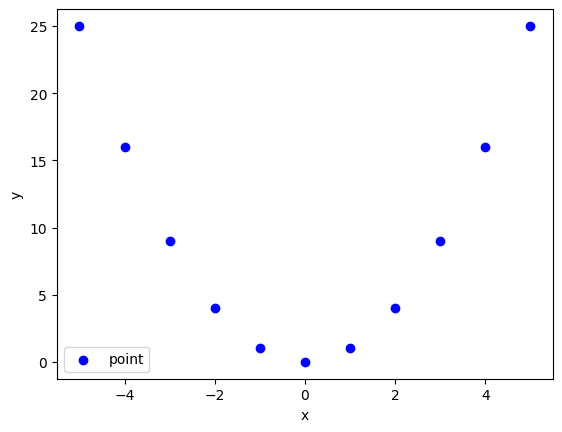

In [ ]:
# Передаем параметры для отрисовки
plt.scatter(x_array, y_array, label='point', color='blue')

# Подписываем оси на рисунке
plt.xlabel('x')
plt.ylabel('y')


# Добавляем отображение описания графика
plt.legend()
# Отрисовка графика
plt.show()


В некоторых задачах нам гораздо удобнее представлять связь между данными в качесвте некоторой непрерывной функции, поэтому точки бывает удобно соеденять прямыми линиями. В таком случаее стоит использовать метод *plot*.

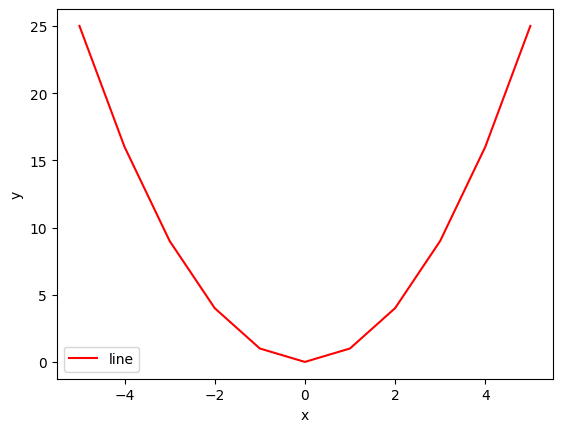

In [ ]:
plt.plot(x_array, y_array, label='line', color='red')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

Совместим отрисовку поточечного графика с отрисованными линиями, для этого достаточн оиспользовать оба метода отрисовки графика

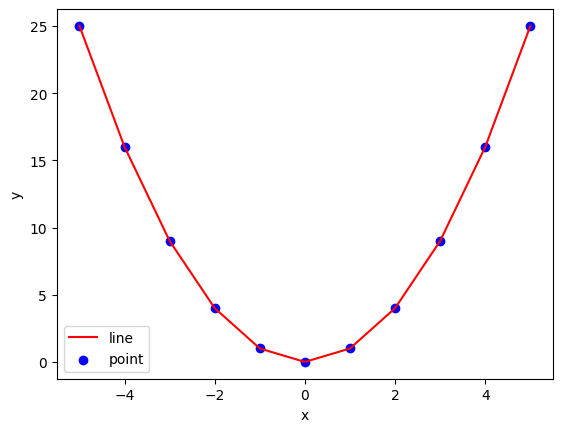

In [ ]:
plt.plot(x_array, y_array, label='line', color='red')
plt.scatter(x_array, y_array, label='point', color='blue')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

При необходимости можно отрисовать несколько графиков на одном рисунке, для этого нужно выбрать подходящий метод отрисовки и указать его перед методами *legend* и *show*.

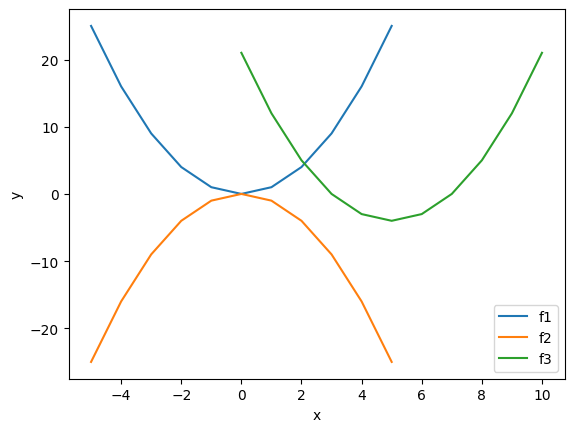

In [ ]:
# Отрисовка первоначальный график f1
plt.plot(x_array, y_array, label='f1')
# Отрисовка инвертированный график функции f1 относительно оси x
plt.plot(x_array, -y_array, label='f2')
# Отрисовка график функции f1 c горизонтальным и вертикальным переносом
plt.plot(x_array + 5, y_array - 4, label='f3')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

# Полезные ссылки



*   Документация [pandas](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)
*   Документация [numpy](https://numpy.org/doc/stable/user/index.html#user)
*   Документация [scipy](https://docs.scipy.org/doc/scipy/tutorial/index.html#user-guide)
*   Документация [matplotlib](https://matplotlib.org/stable/gallery/index.html)

